### Single Layer Perceptron Neural Network

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [4]:
# Load the dataset
data = pd.read_csv('phishing_site_urls.csv')

# Map labels to binary values (good = 0, bad = 1)
data['Label'] = data['Label'].map({'good': 0, 'bad': 1})

# Inspect the data
print(data.head())
print(data.info())


                                                 URL  Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...      1
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      1
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....      1
3  mail.printakid.com/www.online.americanexpress....      1
4  thewhiskeydregs.com/wp-content/themes/widescre...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ MB
None


In [5]:
# Feature engineering
data['url_length'] = data['URL'].apply(len)
data['contains_https'] = data['URL'].apply(lambda x: 1 if 'https' in x else 0)
data['num_special_chars'] = data['URL'].apply(lambda x: sum([1 for char in x if char in '!@#$%^&*()']))

# Define features and target
features = ['url_length', 'contains_https', 'num_special_chars']
X = data[features]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Define the single-layer perceptron
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))  # Output layer with sigmoid activation

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.05), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs=10,        # Number of epochs
                    batch_size=32,    # Mini-batch size
                    validation_data=(X_test, y_test),
                    verbose=1)



Epoch 1/10
13734/13734 [==============================] - 24s 2ms/step - loss: 0.5830 - accuracy: 0.7340 - val_loss: 0.5902 - val_accuracy: 0.7289
Epoch 2/10
13734/13734 [==============================] - 25s 2ms/step - loss: 0.5831 - accuracy: 0.7339 - val_loss: 0.5806 - val_accuracy: 0.7321
Epoch 3/10
13734/13734 [==============================] - 30s 2ms/step - loss: 0.5830 - accuracy: 0.7338 - val_loss: 0.5829 - val_accuracy: 0.7249
Epoch 4/10
13734/13734 [==============================] - 29s 2ms/step - loss: 0.5830 - accuracy: 0.7339 - val_loss: 0.5829 - val_accuracy: 0.7362
Epoch 5/10
13734/13734 [==============================] - 25s 2ms/step - loss: 0.5833 - accuracy: 0.7338 - val_loss: 0.5810 - val_accuracy: 0.7312
Epoch 6/10
13734/13734 [==============================] - 29s 2ms/step - loss: 0.5831 - accuracy: 0.7338 - val_loss: 0.5810 - val_accuracy: 0.7370
Epoch 7/10
13734/13734 [==============================] - 27s 2ms/step - loss: 0.5830 - accuracy: 0.7339 - val_loss: 0

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.4f}")



Test Accuracy: 0.7355
3434/3434 [==============================] - 5s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     78585
           1       0.85      0.09      0.16     31285

    accuracy                           0.74    109870
   macro avg       0.79      0.54      0.50    109870
weighted avg       0.77      0.74      0.65    109870

ROC AUC: 0.5199


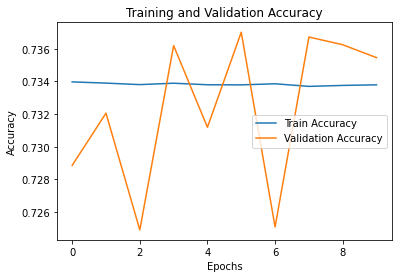

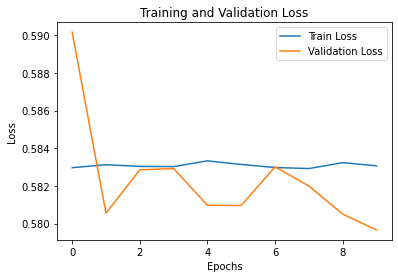

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



In [11]:
def preprocess_url(url):
    url_length = len(url)
    contains_https = 1 if 'https' in url else 0
    num_special_chars = sum([1 for char in url if char in '!@#$%^&*()'])
    return scaler.transform([[url_length, contains_https, num_special_chars]])

test_url = "http://suspicious-site.xyz/login"
test_features = preprocess_url(test_url)
prediction = model.predict(test_features)
print(f"The URL '{test_url}' is classified as: {'BAD' if prediction[0][0] > 0.5 else 'GOOD'}")


1/1 [==============================] - 0s 33ms/step
The URL 'http://suspicious-site.xyz/login' is classified as: GOOD
